In [133]:
# BMI Dataset
# Pertemuan ke-40
# Willi Sianturi
# 27 Mei 2022

# Import library
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split

In [134]:
data = pd.read_csv("D:/myproject/datasets/bmi.csv")
data.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [135]:
def gender_to_int(data):
    if data == "Male":
        return 1
    return 0

data['Gender'] = data['Gender'].apply(gender_to_int)

In [136]:
data.head()
# data = data.sample(200)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [137]:
# X = data[['Gender', 'Height', 'Weight']]
# y = data.Index

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

X = data[["Height", "Weight"]]
y = data.Index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [138]:
algorithms = {
    "KKN": KNeighborsClassifier,
    "SVM": svm.SVC,
    "LINEAR": linear_model.LinearRegression,
    "NAIVE": GaussianNB,
}

algorithms.items()

dict_items([('KKN', <class 'sklearn.neighbors._classification.KNeighborsClassifier'>), ('SVM', <class 'sklearn.svm._classes.SVC'>), ('LINEAR', <class 'sklearn.linear_model._base.LinearRegression'>), ('NAIVE', <class 'sklearn.naive_bayes.GaussianNB'>)])

In [139]:
scores = {
    "KKN": 0,
    "SVM": 0,
    "LINEAR": 0,
    "NAIVE": 0,
}

In [140]:
for name, algoritma in algorithms.items():
    algo = algoritma()
    algo.fit(X_train, y_train)
    scores[name] = algo.score(X_test, y_test)
    
scores

{'KKN': 0.92,
 'SVM': 0.8933333333333333,
 'LINEAR': 0.7919154097821577,
 'NAIVE': 0.7666666666666667}

<AxesSubplot:ylabel='Score of Algo'>

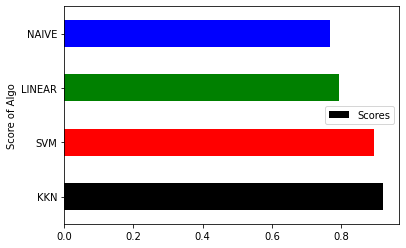

In [141]:
df = pd.DataFrame({
    "Algoritma": scores.keys(),
    "Scores": scores.values()
})

df.plot(
    x="Algoritma",
    y="Scores",
    kind="barh",
    xlabel="Score of Algo",
    color=["black", "red", "green", "blue"]
)